linear fit: y=0.028129487783778738x + -0.0008502682174258425
Pearson's r = 0.9994867738933824
SSE = 0.00045078391876743286
R-square = 0.9989738111878013
CI_half_width = 5.109540908432297e-09
Confidence Interval=(0.02812948267423783, 0.028129492893319646)


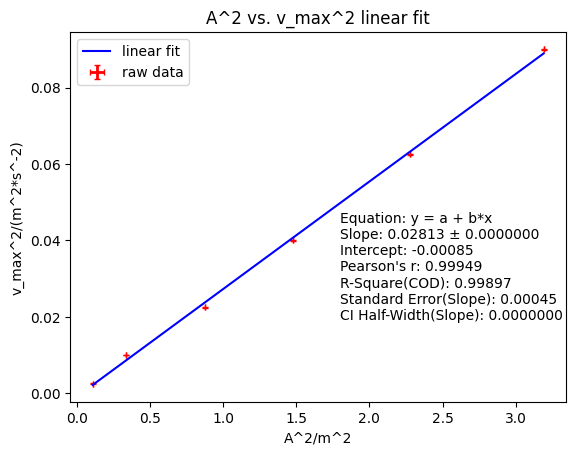

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
from scipy import stats

config={
    "text_x": 1.8,
    "text_y": 0.015,
    "title": "A^2 vs. v_max^2 linear fit",
    "label_x": "A^2/m^2",
    "label_y":"v_max^2/(m^2*s^-2)"
}

def linear_fit(x,y,x_err,y_err):
    # error bar
    plt.errorbar(x,y,y_err,x_err,fmt="",ecolor="r",elinewidth=2,capsize=2,linestyle="")
    
    # lieanr fit
    x_train=np.array(x)
    y_train=np.array(y)
    x_err=np.array(x_err)
    y_err=np.array(y_err)

    # 权重矩阵，将误差的倒数平方作为权重
    weights = 1 / (x_err**2)

    # 执行线性回归拟合
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_train, y_train)
    print(f"linear fit: y={slope}x + {intercept}");

    # 计算斜率的标准误差
    slope_stderr = std_err / np.sqrt(np.sum(weights))

    # 计算置信区间
    n = len(x)  # 样本数量
    dof = n - 2  # 自由度
    t_value = stats.t.ppf(0.975, dof)  # t分布上分位点，置信水平为95%
    confidence_interval = (slope - slope_stderr * t_value, slope + slope_stderr * t_value)



    # plot regression line
    x_fit=np.linspace(x[0],x[-1],10000)
    y_fit=slope*x_fit+intercept
    plt.plot(x_fit,y_fit,"b")

    # basic plot set
    plt.title(config["title"])
    plt.xlabel(config["label_x"])
    plt.ylabel(config["label_y"])
    plt.legend(["linear fit","raw data"])

    # statistics 
    y_pred=x_train*slope+intercept

    pearson_r=r_value
    sse=std_err
    r_squared=r_value**2
    ci_half_width=(confidence_interval[1]-confidence_interval[0])/2

    print(f"Pearson's r = {pearson_r}")
    print(f"SSE = {sse}")
    print(f"R-square = {r_squared}")
    print(f"CI_half_width = {ci_half_width}")
    print(f"Confidence Interval={confidence_interval}")

    # statistics plot
    text_str="Equation: y = a + b*x\n"
    text_str+="Slope: {0:.5f} ± {1:.7f} \n".format(slope, t_value*slope_stderr)
    text_str+="Intercept: {0:.5f}\n".format(intercept)
    text_str+="Pearson's r: {0:.5f}\n".format(pearson_r)
    text_str+="R-Square(COD): {0:.5f}\n".format(r_squared)
    text_str+="Standard Error(Slope): {0:.5f}\n".format(sse)
    text_str+="CI Half-Width(Slope): {0:.7f}\n".format(ci_half_width)
    # text_str+="Uncertainty: {0:.7f}".format(t_value*slope_stderr)

    plt.text(config["text_x"],config["text_y"],text_str)


    plt.show()


L=[0.10798,0.33778,0.87286,1.47958,2.27968,3.19108]
F=[0.0025,0.01,0.0225,0.04,0.0625,0.09]
L_err=[0.00001,0.00001,0.00001,0.00001,0.00001,0.00001]
F_err=[0.0001,0.0001,0.0001,0.0001,0.0001,0.0001]

linear_fit(L,F,L_err,F_err)